<img src=88x31.png  width="10%"> 

## Overview of the notebook:
   
   1. [Plotting of 2D-Data in Singleplots](#2dplots)
   2. [Plotting of 2D Coordinate lists](#coords)
   3. [Plots arranged side-by-side or in a figure](#figure)
   4. [Changing the size of a figure](#figuresize)
   5. [Plotting of 3D-Data in Singleplots](#3dplots)


In [4]:
import numpy as np                   # numeric python
import matplotlib.pyplot as plt      # plot library
import matplotlib.mlab as mlab       
 
import scipy as sp                   # scientific python
#import scipy.stats as sts
from scipy import stats              # statistical distributions

import pandas as pd                  # dataframes, data containers
import skimage.io as skio            # images
import glob
%matplotlib inline

Tuckey-BoxPlot


ROC AUC

In case of unbalanced classes, e.g. only few positive and a lot of negative data-points the classification accuracy is an insuffi- cient performance measure as a classifier that would predict the negative class for the whole dataset would earn a very high accu- racy without any correct prediction of the positive class. Receiver Operator Characteristics (ROC- curves) serve as basis for an in- dependent measure of performance (ROCAUC) which is widely used for such cases in machine learning. The ROC-curve shows a diagram with the false-positive rate ( P(FP), specificity or FPR, horizontal axis) vs. the true-positive rate ( P(TP), sensitivity or TPR, vertical axis) of a classifier. Both relative frequencies speci- ficity & sensitivity are evaluated at any cutpoint between the two class distributions and displayed in a diagram which represents the trade-off between them. (cf. figure 13) For practical usage a two-digit number of cutpoints is sufficient to approximate the ROC-curve. The interpretation of the curve is easy comprehensi- ble if for example the discrimination of the used classifier is very good the false-positive rate is very low while the true-positive rate is relative high. This results in a very steep curve which also means that the area under the curve is high

Importing of a list of TIF files from a folder
===

** and check if 'NaN' Values of 'infinity' are present in the raster, if yes replace them by zero...  **

such a previous check of data consistencey is basic for later calculation on the raster-files. If 'NaN' or 'Infty' pixel-values are within the data most numpy functions might fail and cause script crashes.

In [2]:
import glob
Folder='data/AOI3_V7_Train/'
#Folder='../../_Data_ori_Tif/AOI2_small_6_Test/'
# https://docs.python.org/2/library/glob.html 
# http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory-in-python
TIFs=glob.glob(Folder+"*.tif")
TFWs=glob.glob(Folder+"*.tfw")
print(TIFs)

['data/AOI3_V7_Train/TIF_AFG_GDEM_V21.tif', 'data/AOI3_V7_Train/TIF_ASPE.tif', 'data/AOI3_V7_Train/TIF_ASPN.tif', 'data/AOI3_V7_Train/TIF_ASPS.tif', 'data/AOI3_V7_Train/TIF_ASPW.tif', 'data/AOI3_V7_Train/TIF_B1.tif', 'data/AOI3_V7_Train/TIF_B10.tif', 'data/AOI3_V7_Train/TIF_B11.tif', 'data/AOI3_V7_Train/TIF_B2.tif', 'data/AOI3_V7_Train/TIF_B3.tif', 'data/AOI3_V7_Train/TIF_B4.tif', 'data/AOI3_V7_Train/TIF_B5.tif', 'data/AOI3_V7_Train/TIF_B6.tif', 'data/AOI3_V7_Train/TIF_B7.tif', 'data/AOI3_V7_Train/TIF_B8.tif', 'data/AOI3_V7_Train/TIF_B9.tif', 'data/AOI3_V7_Train/TIF_Curvature.tif', 'data/AOI3_V7_Train/TIF_DistStreams.tif', 'data/AOI3_V7_Train/TIF_EucDist_badakhshan.tif', 'data/AOI3_V7_Train/TIF_EucDist_faults.tif', 'data/AOI3_V7_Train/TIF_EucDist_roads.tif', 'data/AOI3_V7_Train/TIF_lc93_32.tif', 'data/AOI3_V7_Train/TIF_lith_type.tif', 'data/AOI3_V7_Train/TIF_NDVI.tif', 'data/AOI3_V7_Train/TIF_precip.tif', 'data/AOI3_V7_Train/TIF_Slope.tif', 'data/AOI3_V7_Train/TIF_TrueLabels.tif']


Now a list of the file names inside the above folder is saved in the variable **"TIFs"**.
I can now iterate over the files and check each of them for data consistency. 

In [5]:
i=0
LayerTrain=dict()

for filr in TIFs:
    
    if '_AF' in filr or '_B' in filr or '_C' in filr or '_Di' in filr or '_E' in filr or '_p' in filr or '_S' in filr or '_N' in filr:
        #print i, filr.split("/")[4][0:4]+'r_'+filr.split("/")[4][4:-4]
        name=filr.split("/")[2][0:4]+'r_'+filr.split("/")[2][4:-4]
        print( i,name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
        if 'DistStreams' in filr or 'faults' in filr or 'roads' in filr or 'badakh' in filr:
            LayerTrain[name]=np.log(LayerTrain[name])
            
            print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            print( 'Anzahl infty : {}'.format(np.sum(np.isinf(LayerTrain[name])*1)))
            LayerTrain[name][np.isinf(LayerTrain[name])]=0
            print( 'Wert infty durch 0 ersetzt / Anzahl infty jetzt: {}'.format(np.sum(np.isinf(LayerTrain[name])*1)))
                
    elif '_AS' in filr or '_l' in filr :
        #print i, filr.split("/")[4][0:4]+'n_'+filr.split("/")[4][4:-4]
        name=filr.split("/")[2][0:4]+'n_'+filr.split("/")[2][4:-4]
        print( i,name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
        if 'lc93' in filr:
            LayerTrain['TIF_n_LanduseRAL'] =((LayerTrain.get(name) == 1) | (LayerTrain.get(name) ==5))*1.0
            print( 'TIF_n_LanduseRAL ', LayerTrain['TIF_n_LanduseRAL'].shape)  #Rainfed Agricultural Land....ok
            LayerTrain['TIF_n_LanduseRL']  =( LayerTrain.get(name) == 2)*1.0
            print( 'TIF_n_LanduseRL ', LayerTrain['TIF_n_LanduseRL'].shape)    #Range Land....ok
            LayerTrain['TIF_n_LanduseIRA'] =((LayerTrain.get(name) == 4) | (LayerTrain.get(name) ==9) |(LayerTrain.get(name) ==10))*1.0
            print( 'TIF_n_LanduseIRA ', LayerTrain['TIF_n_LanduseIRA'].shape ) #Irrigated Agricultural Land....ok
            
            # ----------------------------------------------- 
            #plt.imshow(TIF_lc93_32 ==3)                                            #Sandcover, !!!!!nicht vorhanden
            #plt.imshow(TIF_lc93_32 ==6)  ==8) ==14)                               # % Waterbody and Marshland !!!! nicht vorhanden
            # TIF_lc93_32==7)  % Fruit Trees.......... Fruchtbäume)  !!!nicht vorhanden
            #plt.imshow(TIF_lc93_32 ==11,12,13)  % Vineyards  .......... Weinberge) % Forest and Shrubs ... !!!nicht vorhanden
            #plt.show()
            
            del LayerTrain[name] 
        if 'lith' in filr:
            LayerTrain['TIF_n_VOLC'] =(LayerTrain.get(name) == 1)*1.0  # % Volcanic ...... Vulkanisches Gestein
            print( 'TIF_n_VOLC ', LayerTrain['TIF_n_VOLC'].shape)
            LayerTrain['TIF_n_SEDI'] =(LayerTrain.get(name) == 2)*1.0  # % Sedimentary ... Sedimente
            print( 'TIF_n_SEDI ', LayerTrain['TIF_n_SEDI'].shape)
            LayerTrain['TIF_n_PLUT'] =(LayerTrain.get(name) == 3)*1.0  # % Plutonic....... Plutonisches Gestein
            print( 'TIF_n_SEDI ', LayerTrain['TIF_n_SEDI'].shape)
            
            #TIF_META= (TIF_lith_type == 4) # % Metamorphic.... Metamorphes Gestein .... nicht vorhanden!!!! 
            del LayerTrain[name]                   
            

    elif '_Tr' in filr:
        #print i, filr.split("/")[4][0:-4]
        name =filr.split("/")[2][0:-4]
        print( i, name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        LayerTrain[name]=(LayerTrain.get(name) > 0)*1.0             # TrueLabels auf Intervall [0,1] bringen
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
    i+=1

0 TIF_r_AFG_GDEM_V21
(608, 948)
Anzahl NaN : 0
1 TIF_n_ASPE
(608, 948)
Anzahl NaN : 0
2 TIF_n_ASPN
(608, 948)
Anzahl NaN : 0
3 TIF_n_ASPS
(608, 948)
Anzahl NaN : 0
4 TIF_n_ASPW
(608, 948)
Anzahl NaN : 0
5 TIF_r_B1
(607, 948)
Anzahl NaN : 0
6 TIF_r_B10
(607, 948)
Anzahl NaN : 0
7 TIF_r_B11
(607, 948)
Anzahl NaN : 0
8 TIF_r_B2
(607, 948)
Anzahl NaN : 0
9 TIF_r_B3
(607, 948)
Anzahl NaN : 0
10 TIF_r_B4
(607, 948)
Anzahl NaN : 0
11 TIF_r_B5
(607, 948)
Anzahl NaN : 0
12 TIF_r_B6
(607, 948)
Anzahl NaN : 0
13 TIF_r_B7
(607, 948)
Anzahl NaN : 0
14 TIF_r_B8
(607, 947)
Anzahl NaN : 0
15 TIF_r_B9
(607, 948)
Anzahl NaN : 0
16 TIF_r_Curvature
(608, 948)
Anzahl NaN : 0
17 TIF_r_DistStreams
(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 39458
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
18 TIF_r_EucDist_badakhshan


/Users/andreasrichter/anaconda/envs/Py3/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log


(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 2261
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
19 TIF_r_EucDist_faults
(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 8184
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
20 TIF_r_EucDist_roads
(608, 947)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 12088
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
21 TIF_n_lc93_32
(608, 948)
Anzahl NaN : 0
TIF_n_LanduseRAL  (608, 948)
TIF_n_LanduseRL  (608, 948)
TIF_n_LanduseIRA  (608, 948)
22 TIF_n_lith_type
(608, 948)
Anzahl NaN : 0
TIF_n_VOLC  (608, 948)
TIF_n_SEDI  (608, 948)
TIF_n_SEDI  (608, 948)
23 TIF_r_NDVI
(608, 947)
Anzahl NaN : 0
24 TIF_r_precip
(608, 948)
Anzahl NaN : 0
25 TIF_r_Slope
(608, 948)
Anzahl NaN : 0
26 TIF_TrueLabels
(562, 905)
Anzahl NaN : 0


Display each raster file next to it's histogram
===

TIF_TrueLabels


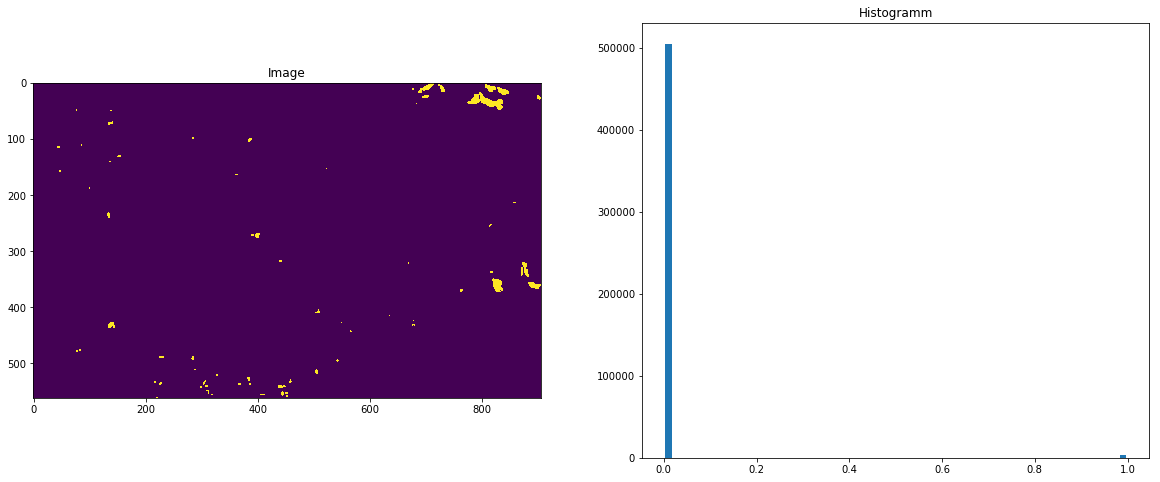

TIF_n_ASPE


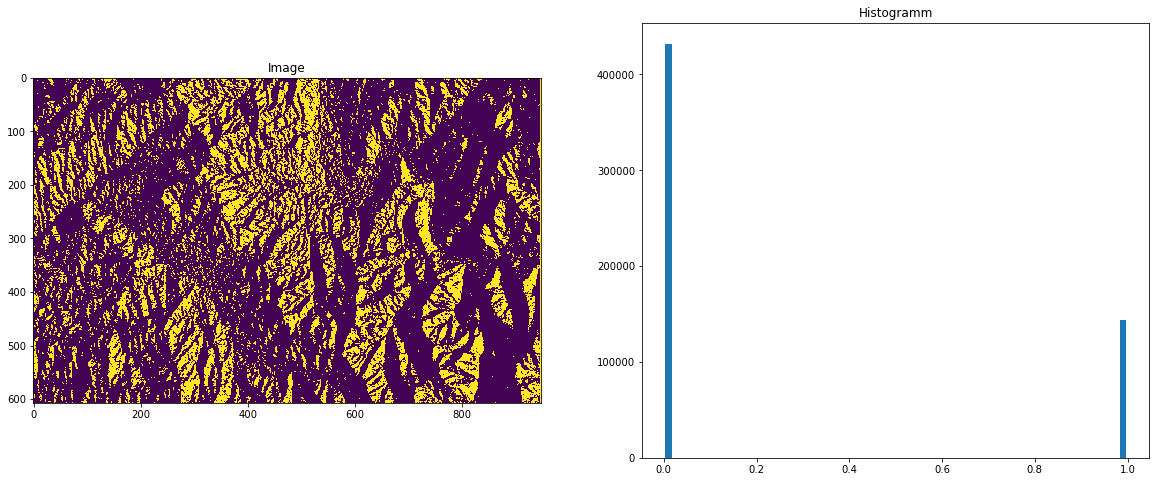

TIF_n_ASPN


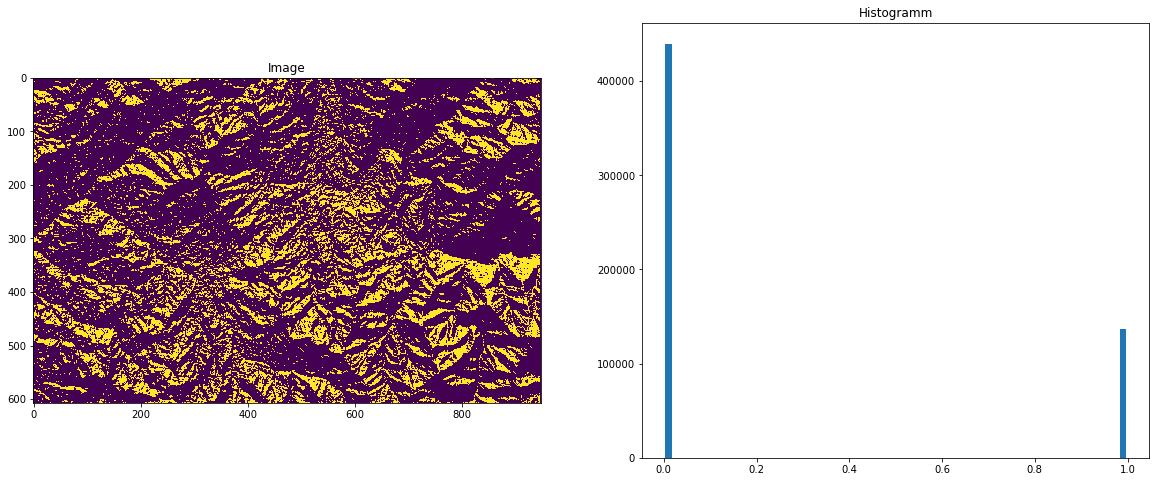

TIF_n_ASPS


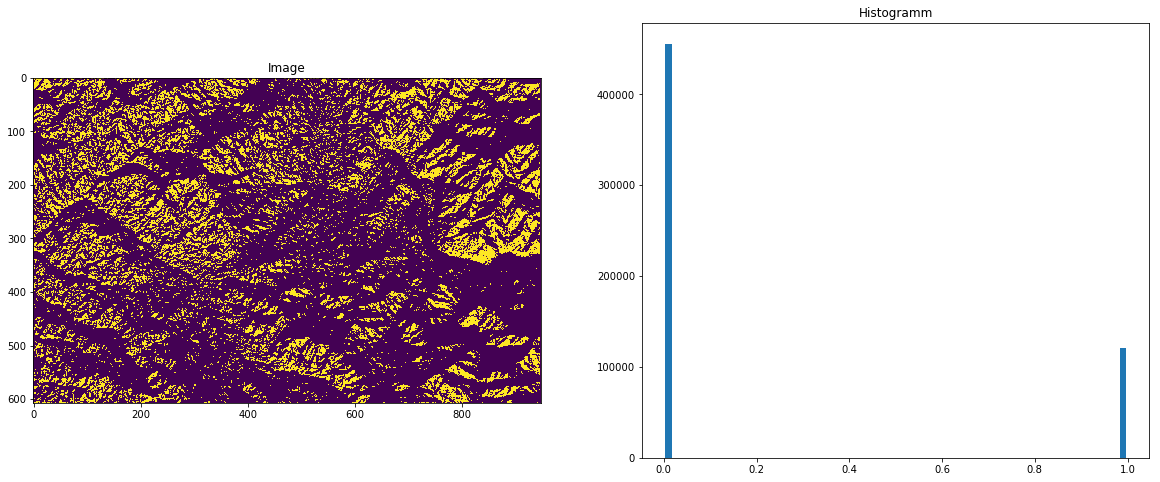

TIF_n_ASPW


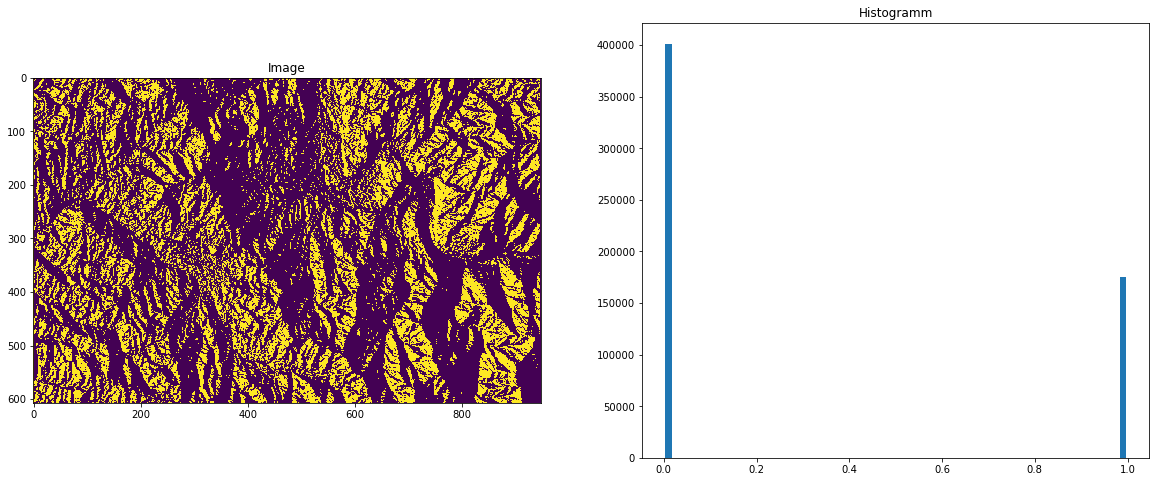

TIF_n_LanduseIRA


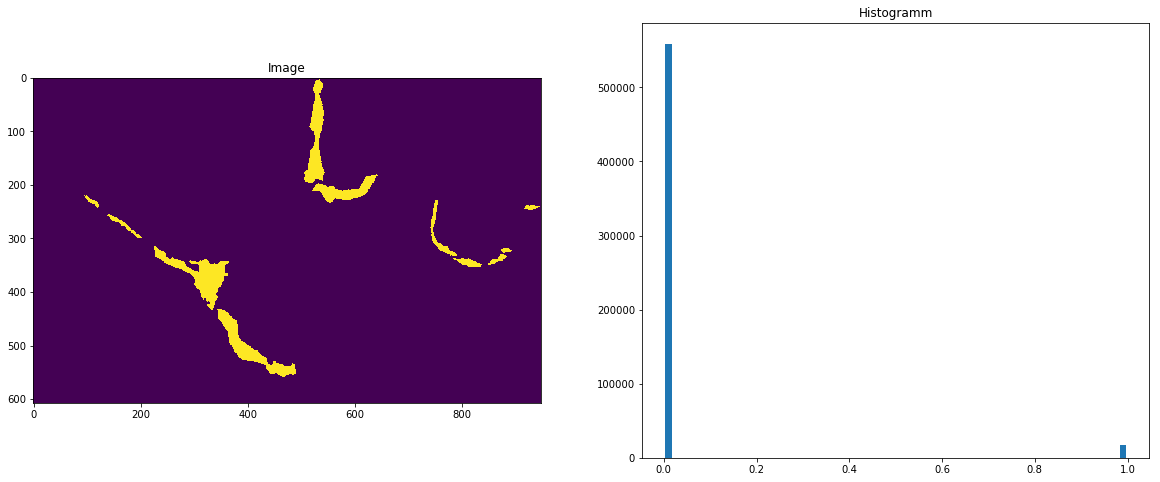

TIF_n_LanduseRAL


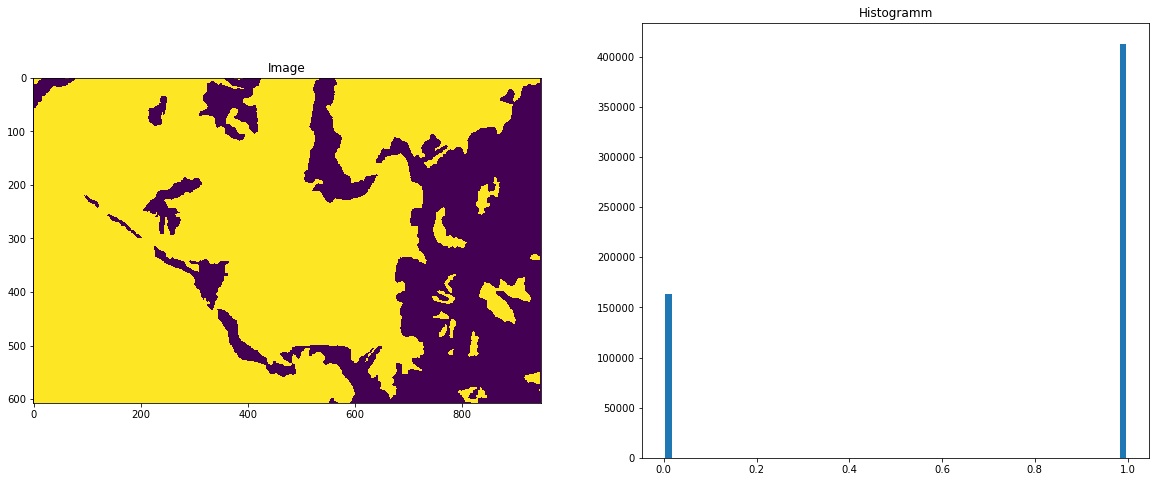

TIF_n_LanduseRL


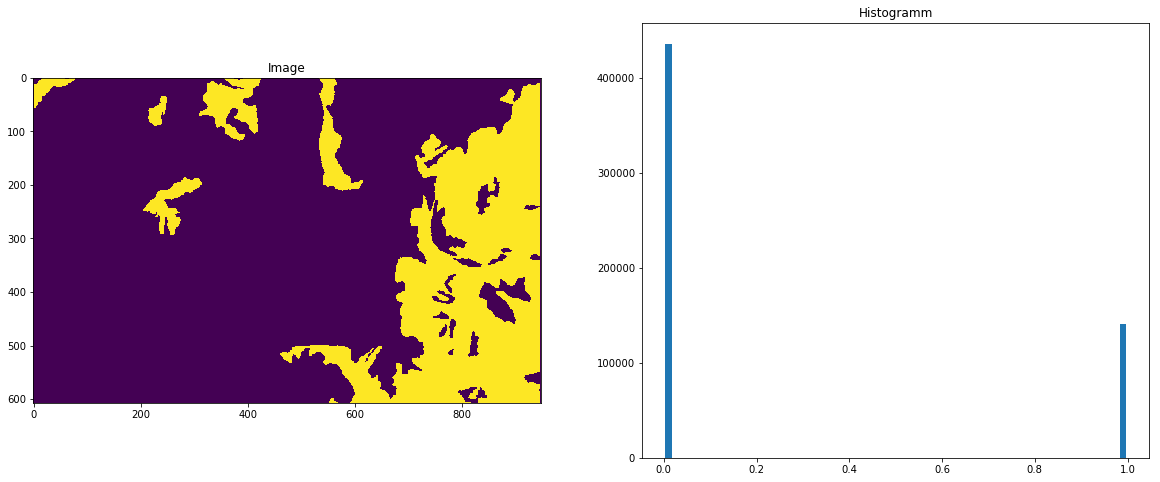

TIF_n_PLUT


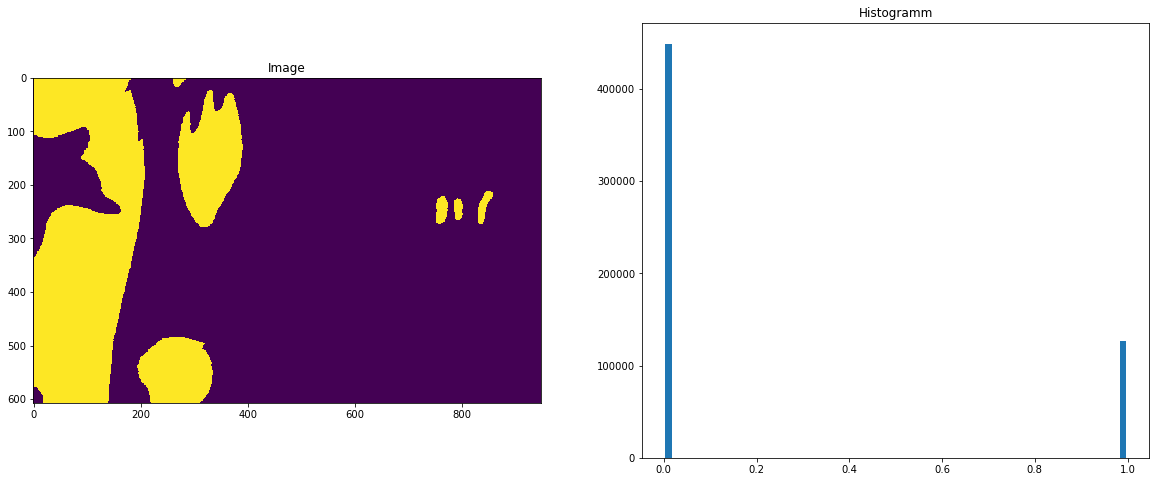

TIF_n_SEDI


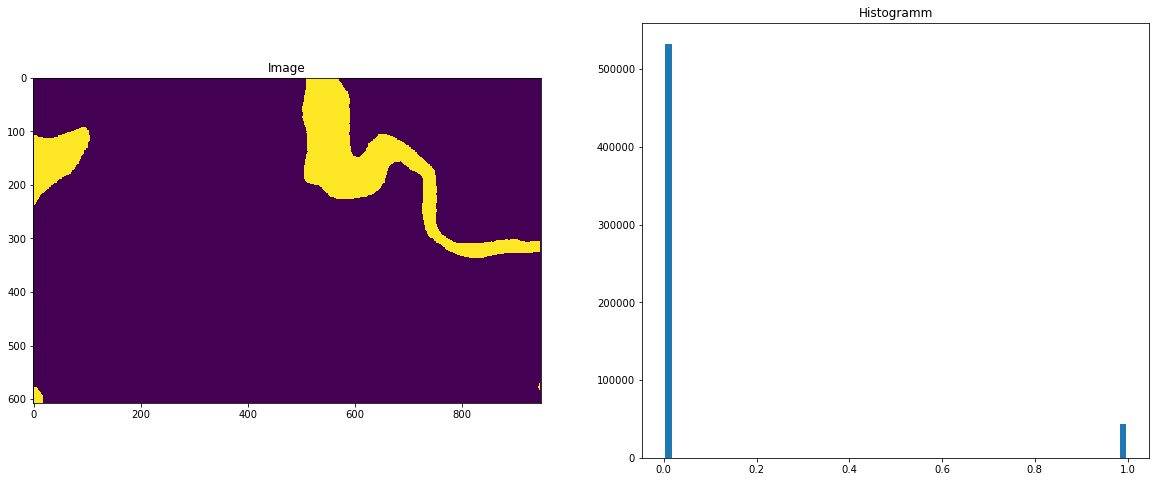

TIF_n_VOLC


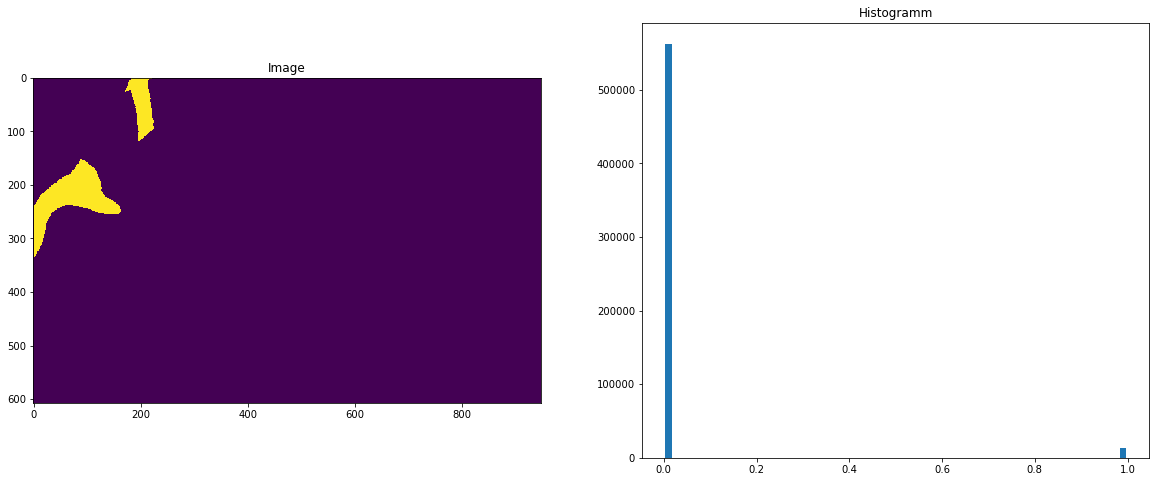

TIF_r_AFG_GDEM_V21


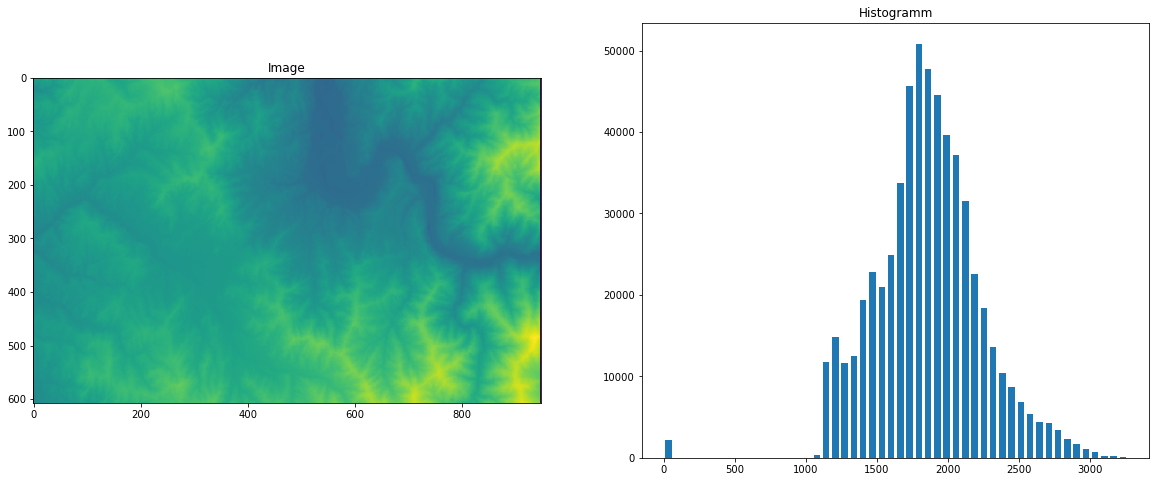

TIF_r_B1


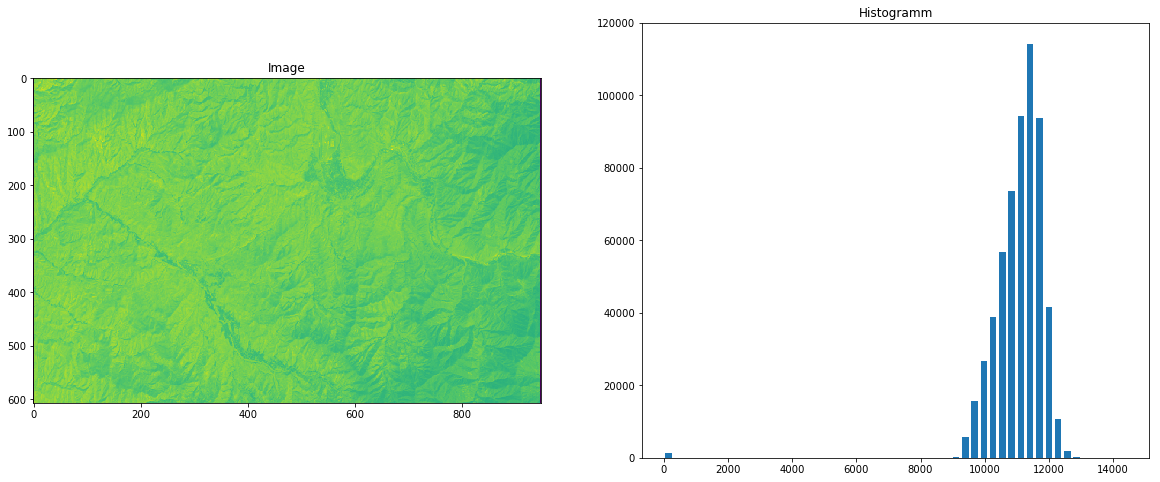

TIF_r_B10


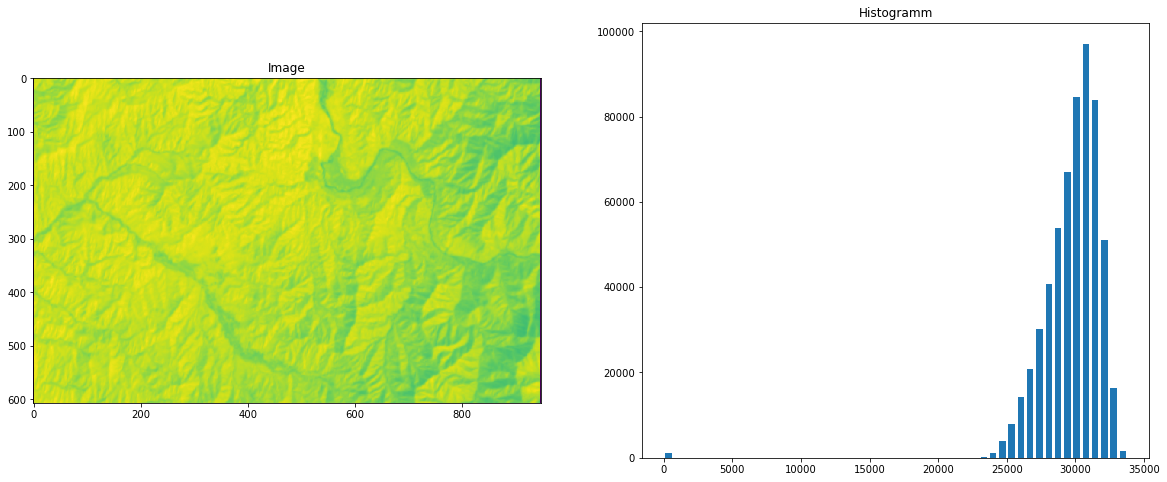

TIF_r_B11


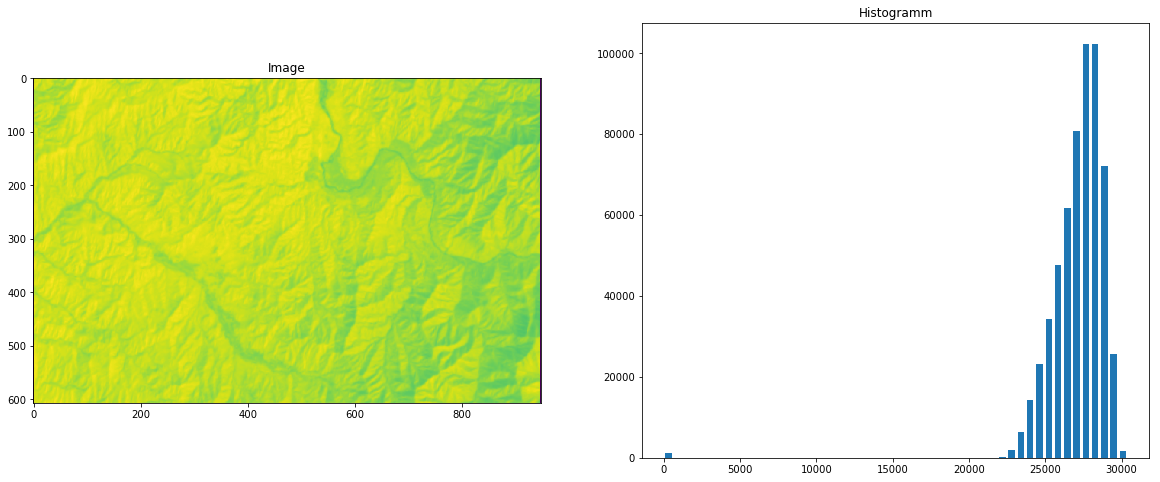

TIF_r_B2


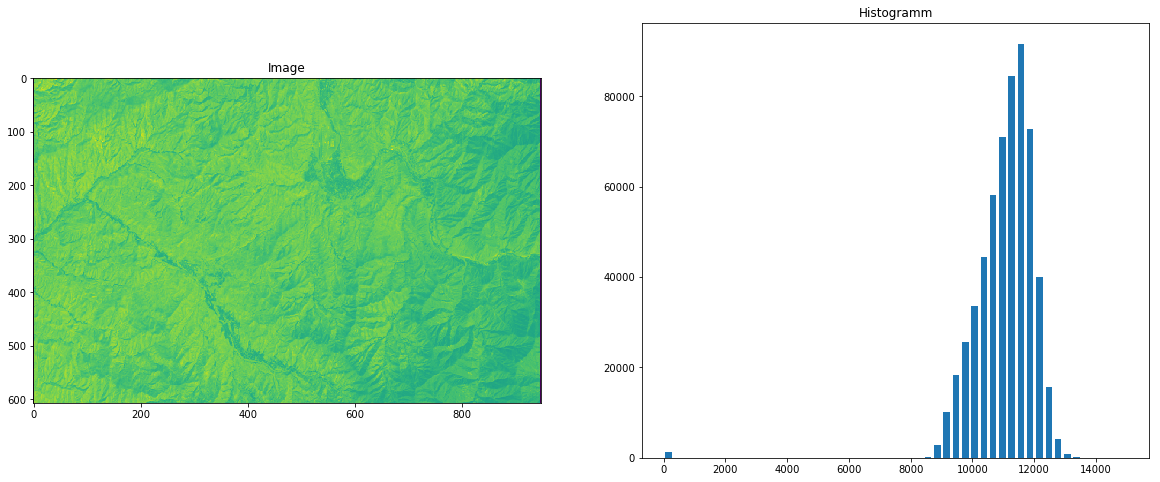

TIF_r_B3


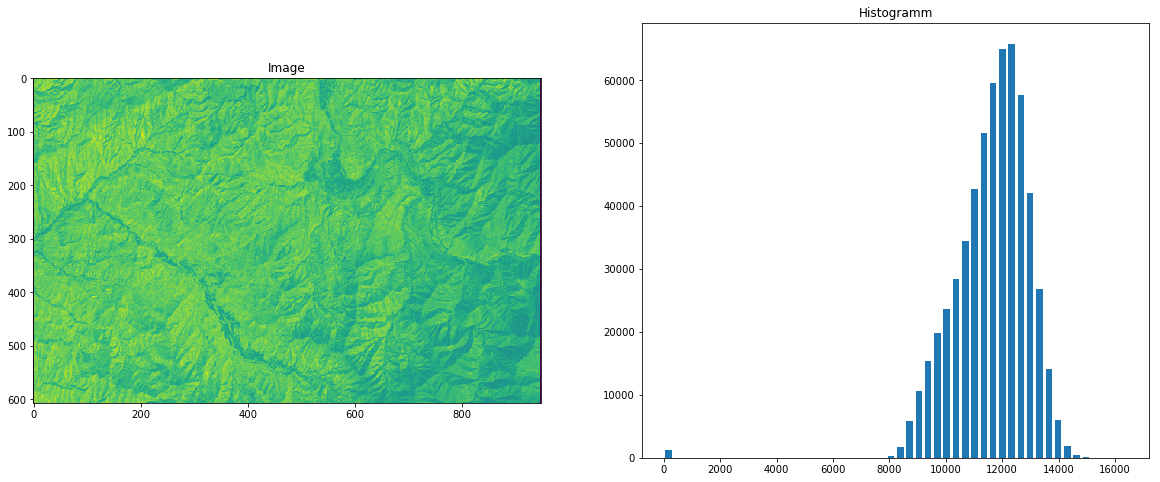

TIF_r_B4


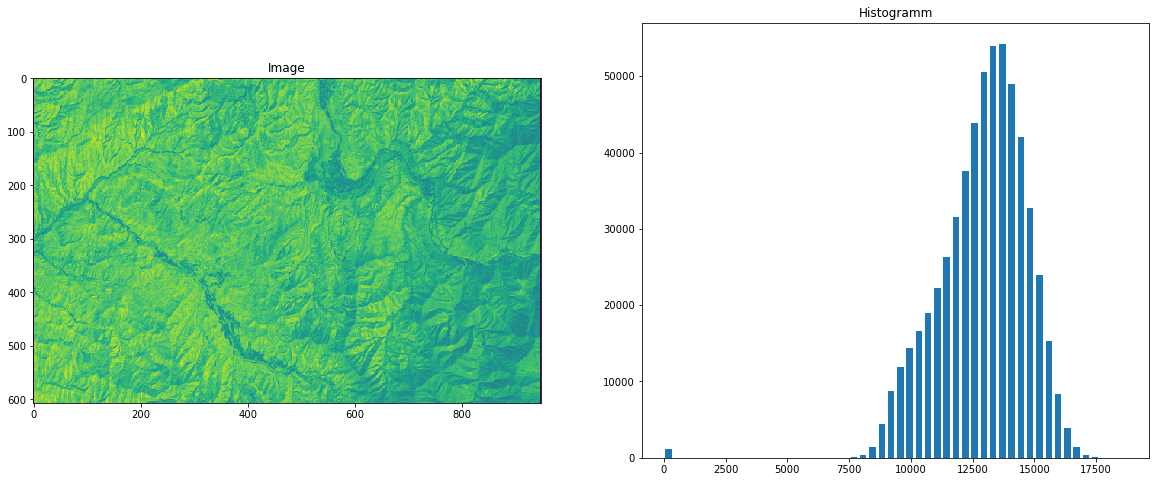

TIF_r_B5


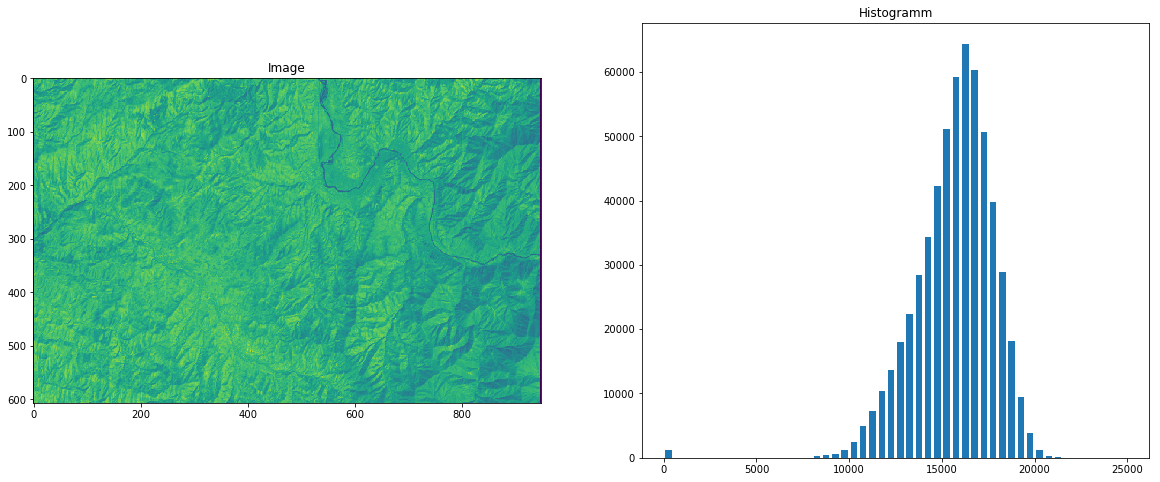

TIF_r_B6


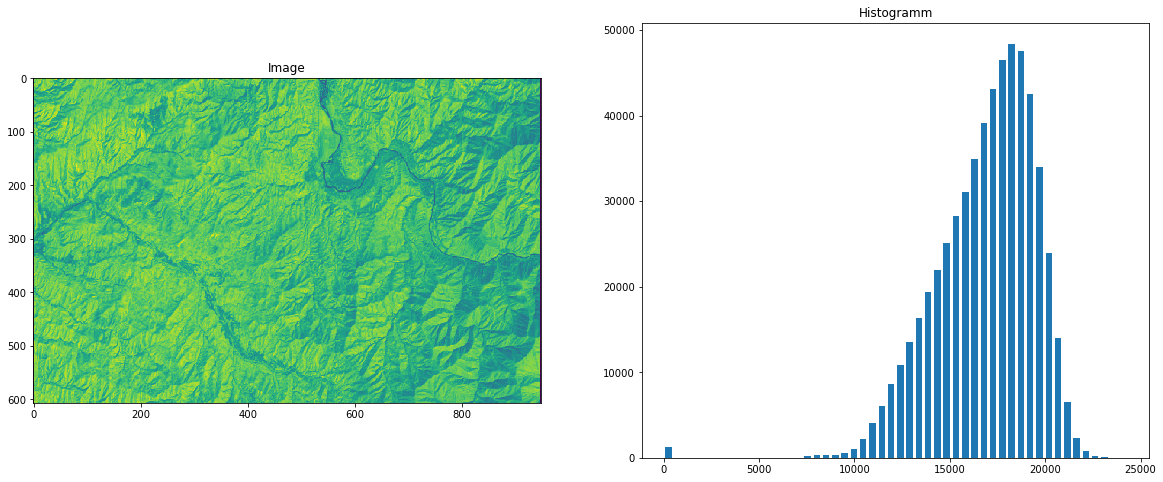

TIF_r_B7


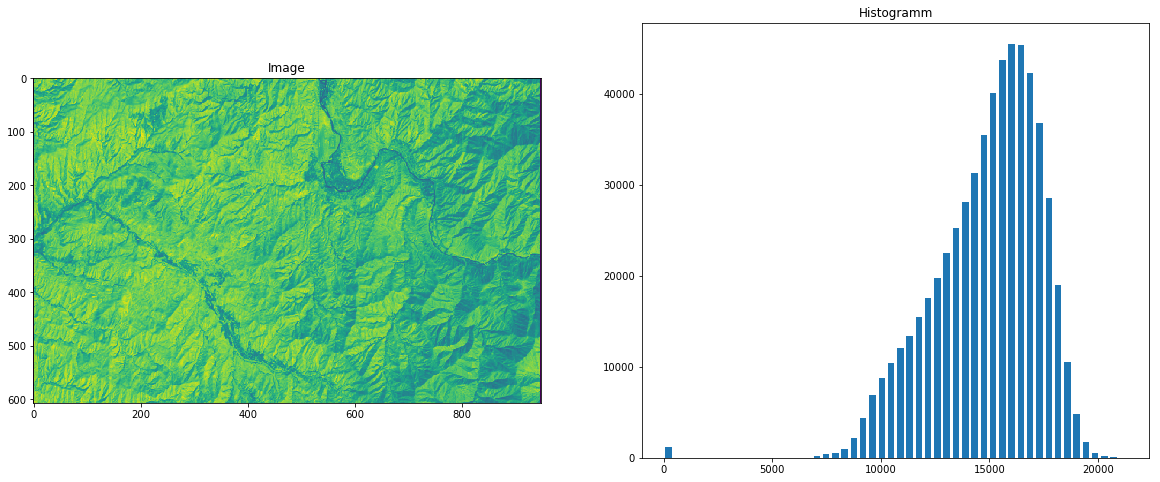

TIF_r_B8


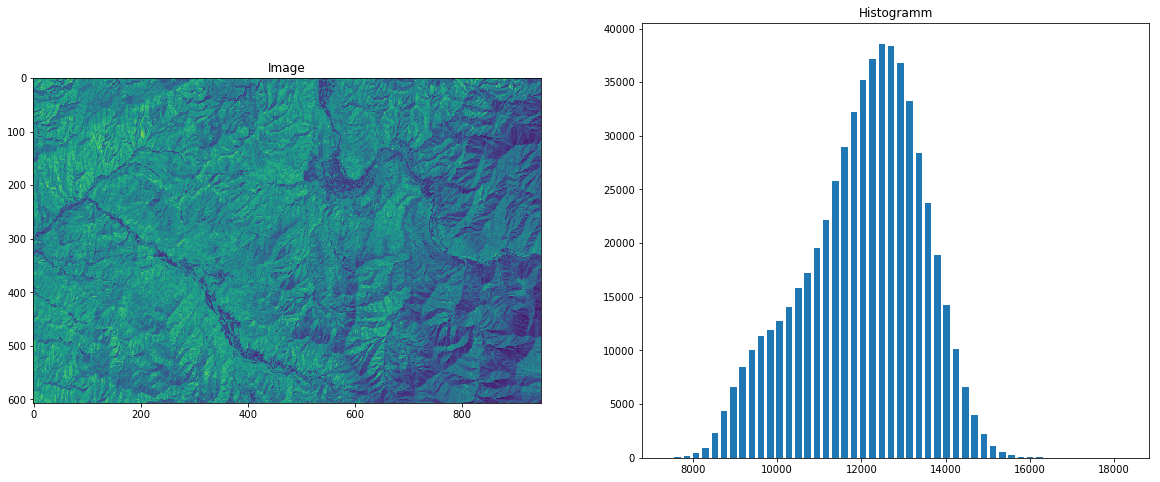

TIF_r_B9


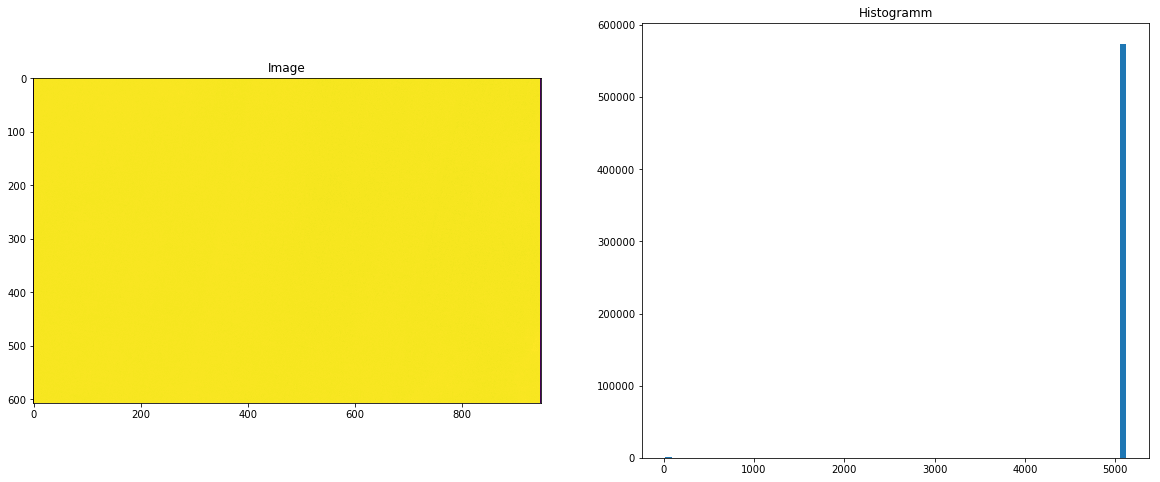

TIF_r_Curvature


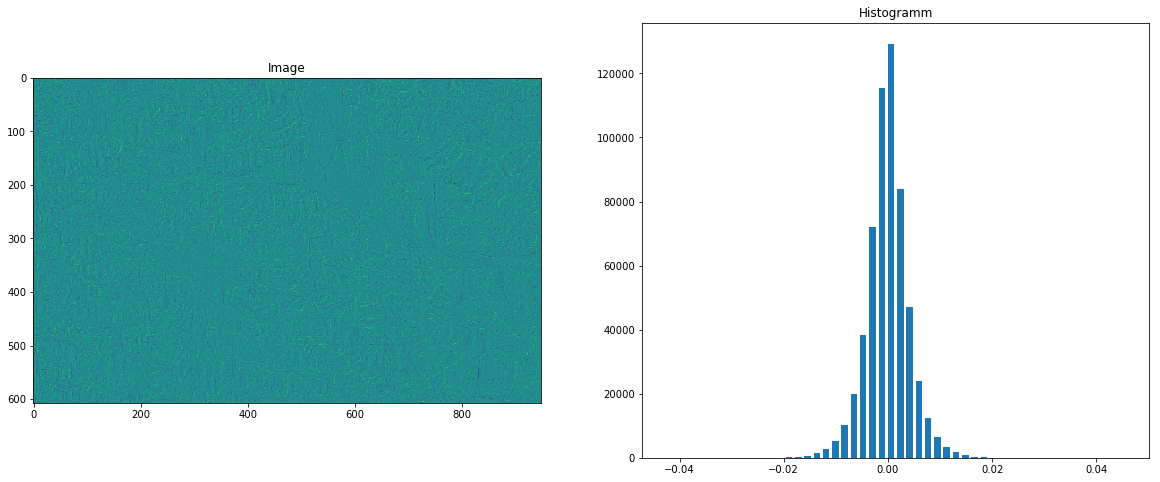

TIF_r_DistStreams


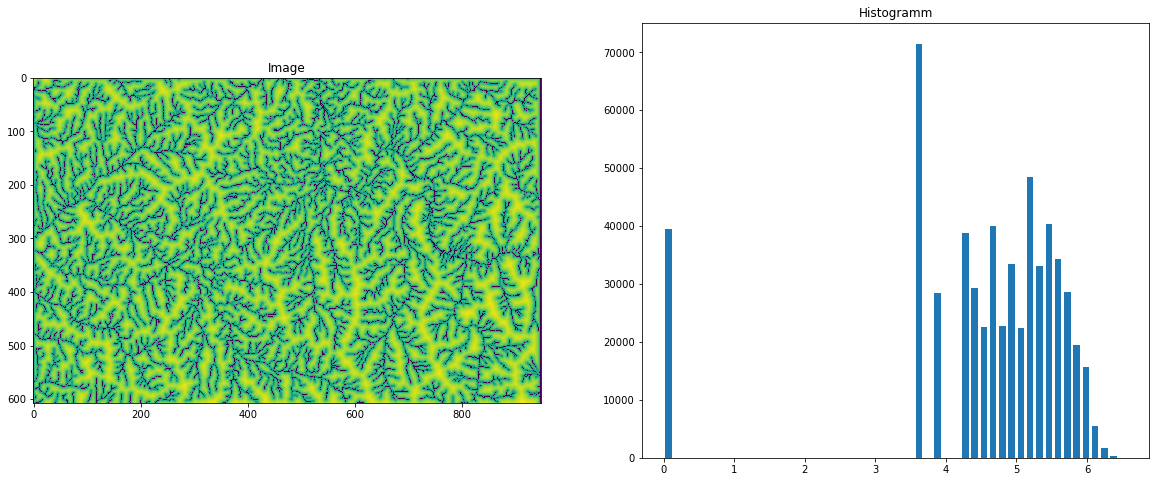

TIF_r_EucDist_badakhshan


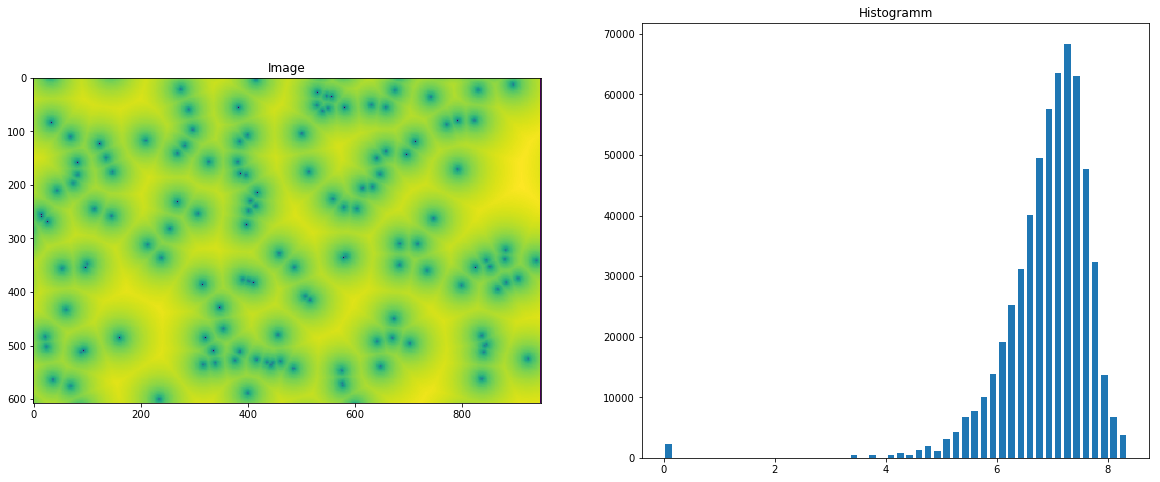

TIF_r_EucDist_faults


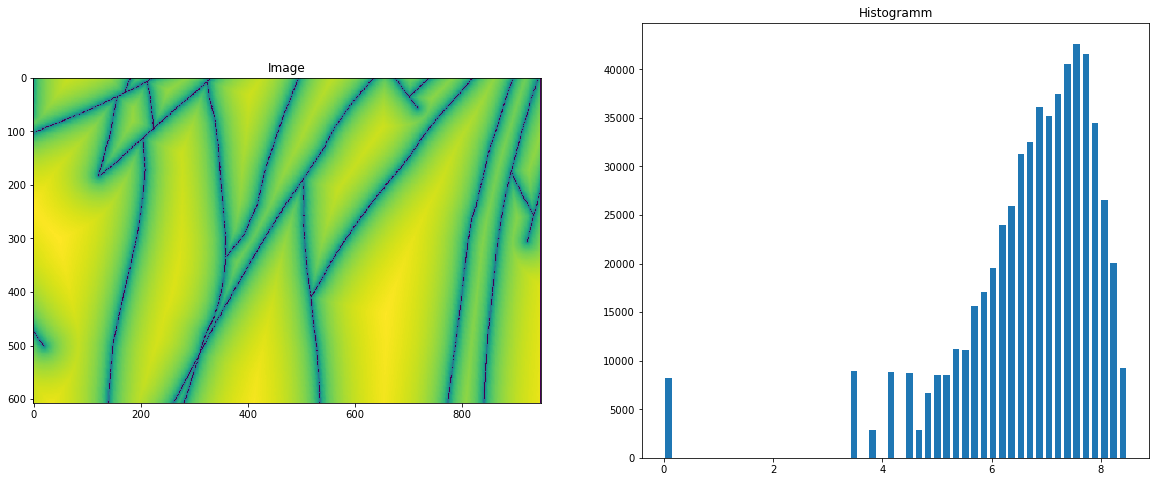

TIF_r_EucDist_roads


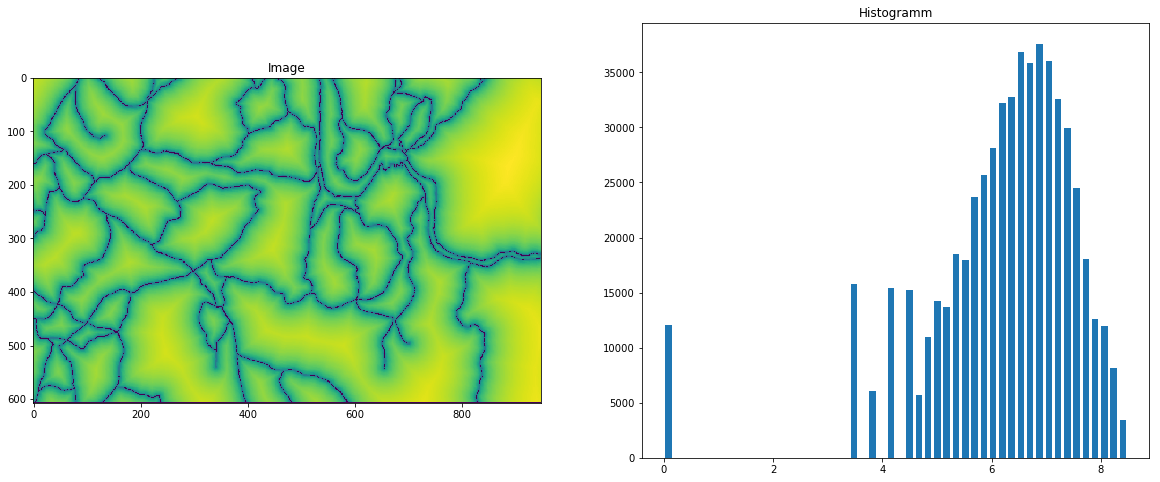

TIF_r_NDVI


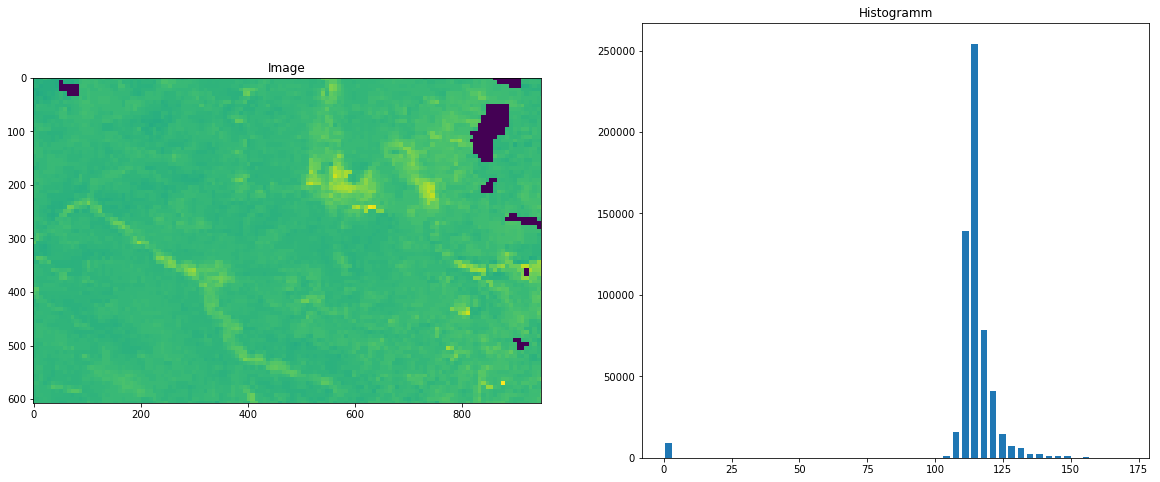

TIF_r_Slope


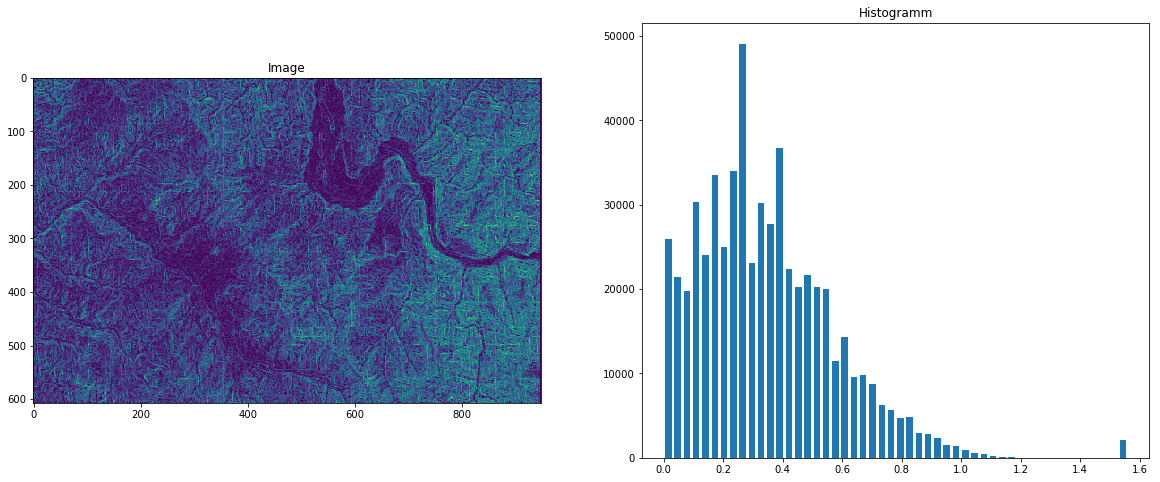

TIF_r_precip


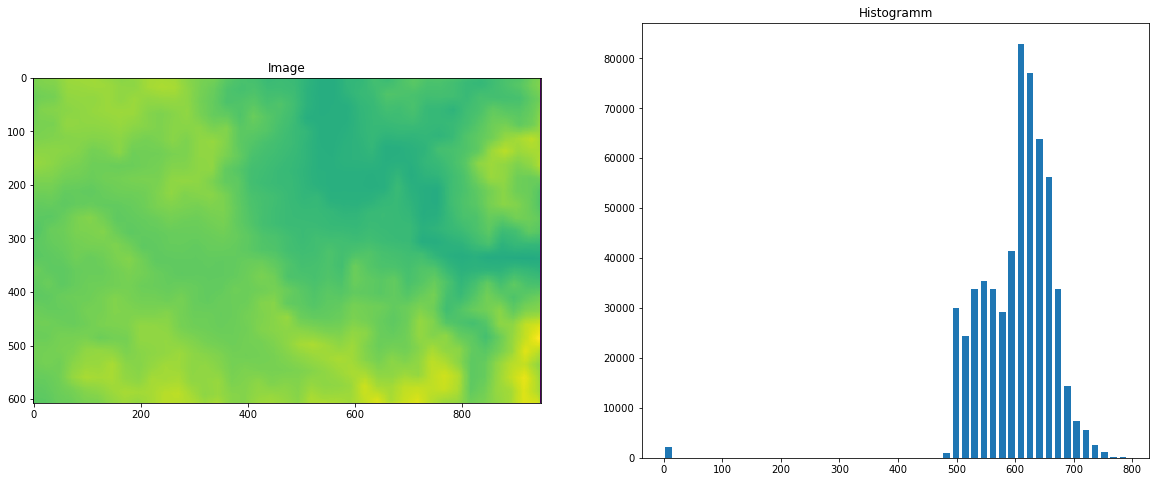

In [6]:
from scripts.BasisFunctions import showImage
    
for layer in sorted(LayerTrain):
    print( layer)
    showImage(LayerTrain.get(layer))
    #print Layers.get(layer)